<a href="https://colab.research.google.com/github/KML1103/NLPCW2---IDENTIFYING-AND-CATEGORIZING-OFFENISVE-LANGUAGE-IN-SOCIAL-MEDIA-BY-DEEP-LEARNING-MODEL-/blob/main/NLPCW2_IDENTIFYING_AND_CATEGORIZING_OFFENISVE_LANGUAGE_IN_SOCIAL_MEDIA_BY_DEEP_LEARNING_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN**

Epoch 1/10
100/100 [==============================] - 10s 93ms/step - loss: 0.5748 - accuracy: 0.7354 - val_loss: 0.2947 - val_accuracy: 0.8941
Epoch 2/10
100/100 [==============================] - 4s 45ms/step - loss: 0.2072 - accuracy: 0.9198 - val_loss: 0.2393 - val_accuracy: 0.9068
Epoch 3/10
100/100 [==============================] - 3s 29ms/step - loss: 0.0812 - accuracy: 0.9750 - val_loss: 0.2777 - val_accuracy: 0.8870
Epoch 4/10
100/100 [==============================] - 4s 38ms/step - loss: 0.0329 - accuracy: 0.9911 - val_loss: 0.3163 - val_accuracy: 0.8884
Epoch 5/10
100/100 [==============================] - 1s 13ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.3534 - val_accuracy: 0.8955
Epoch 6/10
100/100 [==============================] - 1s 13ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.3915 - val_accuracy: 0.8785
Epoch 7/10
100/100 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.4207 - val_accuracy: 0.885

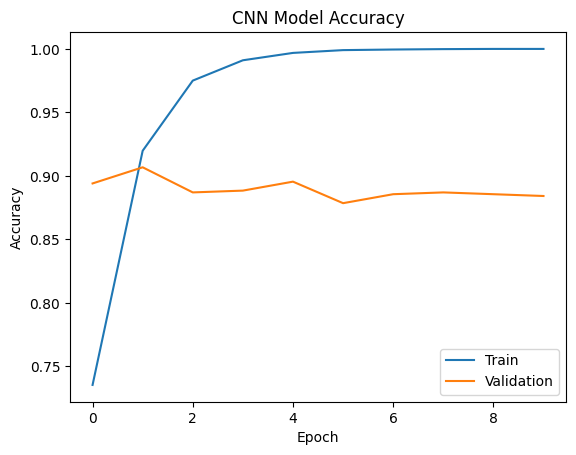

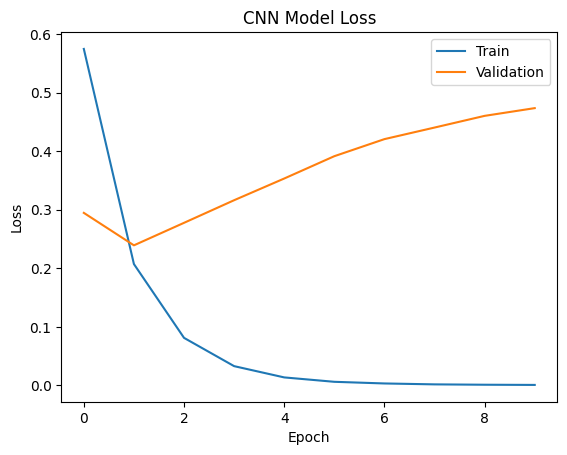

56/56 [==============================] - 0s 2ms/step


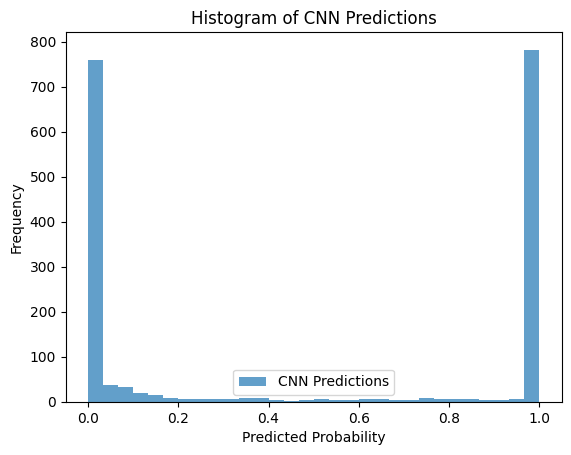

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

data = pd.read_csv('/content/sample_data/offensiveeval.csv')
texts = data['text'].values
labels = data['label'].values

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=100)
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

predictions_cnn = model_cnn.predict(x_test).flatten()
plt.hist(predictions_cnn, bins=30, alpha=0.7, label='CNN Predictions')
plt.title('Histogram of CNN Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**RNN**

Epoch 1/10
100/100 [==============================] - 20s 176ms/step - loss: 0.5256 - accuracy: 0.7287 - val_loss: 0.3318 - val_accuracy: 0.8616
Epoch 2/10
100/100 [==============================] - 14s 138ms/step - loss: 0.1553 - accuracy: 0.9454 - val_loss: 0.2836 - val_accuracy: 0.8771
Epoch 3/10
100/100 [==============================] - 12s 119ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.3273 - val_accuracy: 0.8884
Epoch 4/10
100/100 [==============================] - 12s 119ms/step - loss: 0.0142 - accuracy: 0.9965 - val_loss: 0.3298 - val_accuracy: 0.8856
Epoch 5/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.3856 - val_accuracy: 0.8729
Epoch 6/10
100/100 [==============================] - 10s 105ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.4420 - val_accuracy: 0.8799
Epoch 7/10
100/100 [==============================] - 11s 109ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.4013 - val_ac

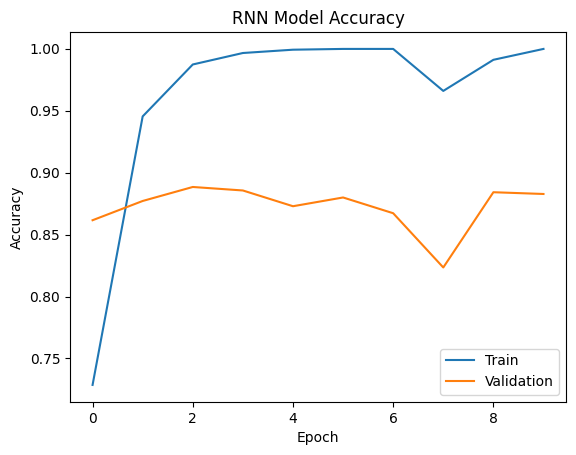

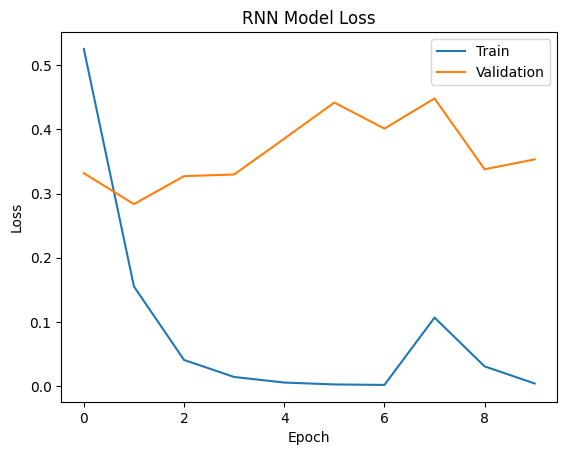

56/56 [==============================] - 1s 10ms/step


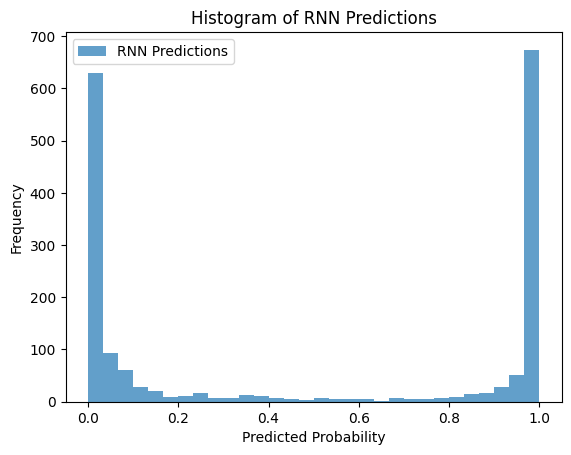

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

data = pd.read_csv('/content/sample_data/offensiveeval.csv')
texts = data['text'].values
labels = data['label'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=100)
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

model_rnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

plt.plot(history_rnn.history['accuracy'], label='Train')
plt.plot(history_rnn.history['val_accuracy'], label='Validation')
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_rnn.history['loss'], label='Train')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

predictions_rnn = model_rnn.predict(x_test).flatten()
plt.hist(predictions_rnn, bins=30, alpha=0.7, label='RNN Predictions')
plt.title('Histogram of RNN Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**LSTM**

Epoch 1/10
100/100 [==============================] - 14s 88ms/step - loss: 0.4589 - accuracy: 0.8012 - val_loss: 0.2714 - val_accuracy: 0.8969
Epoch 2/10
100/100 [==============================] - 4s 43ms/step - loss: 0.1676 - accuracy: 0.9355 - val_loss: 0.2614 - val_accuracy: 0.8898
Epoch 3/10
100/100 [==============================] - 4s 44ms/step - loss: 0.0680 - accuracy: 0.9779 - val_loss: 0.3270 - val_accuracy: 0.8785
Epoch 4/10
100/100 [==============================] - 2s 23ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.4484 - val_accuracy: 0.8559
Epoch 5/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.4445 - val_accuracy: 0.8799
Epoch 6/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.4651 - val_accuracy: 0.8743
Epoch 7/10
100/100 [==============================] - 2s 16ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.5870 - val_accuracy: 0.884

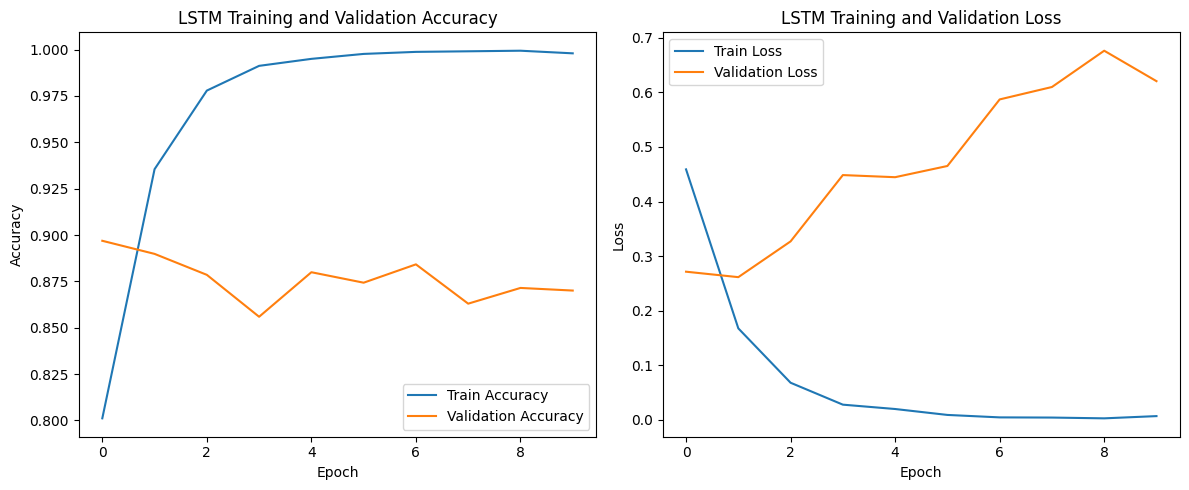

56/56 [==============================] - 1s 3ms/step


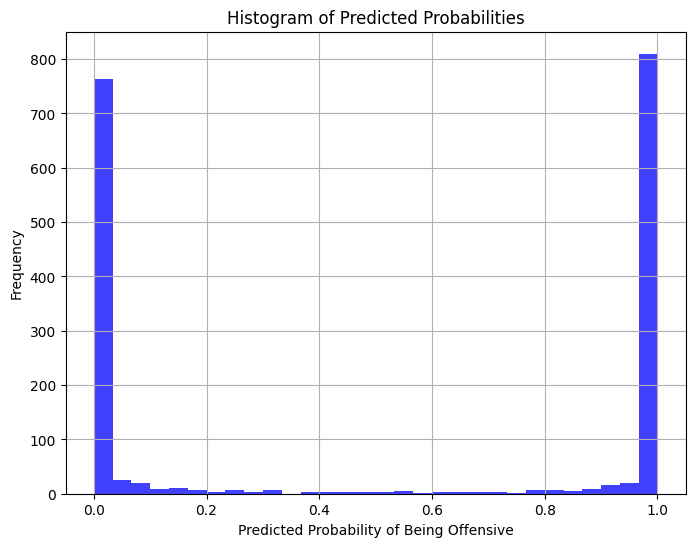

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

data = pd.read_csv('/content/sample_data/offensiveeval.csv')
texts = data['text'].values
labels = data['label'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=100)
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
accuracy_lstm = model_lstm.evaluate(x_test, y_test)[1]
print(f"LSTM Model Accuracy: {accuracy_lstm:.2f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

predictions = model_lstm.predict(x_test).flatten()

plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=30, alpha=0.75, label='Predicted Probabilities', color='blue')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Being Offensive')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
